In [2]:
import numpy as np
from scipy import fft
import cv2
import matplotlib.pyplot as plt

## homomorphic_filtering
Realiza un filtrado de la imagen de entrada mediante la multiplicación en frecuencia del espectro del logaritmo de la señal, con un filtro, en este caso gausseano. Devuelve la imagen filtrada lista para ser representada con `plt.imshow` por ejemplo.

In [30]:
def homomorphic_filtering(x : np.array, gamma_h=0.4, gamma_l=1.6, c=1, D0=0.1, plot_filter=False):
    X = fft.fft2(np.log(x + 0.00001))

    d_center = (np.array(X.shape) - 1) / 2
    d = np.array([np.sqrt((range(x.shape[0]) - d_center[0])**2 + (i - d_center[1])**2) for i in range(x.shape[1])]).T
    H = (gamma_h - gamma_l) * (1 - np.exp(-c * d**2 / (D0 * x.shape[0])**2)) + gamma_l
    H = np.interp(H, (H.min(), H.max()), (H.min(), 1))
    if (plot_filter):
        plt.imshow(H)
        plt.colorbar()

    Y = np.multiply(X, H)
    y = np.exp(fft.ifft2(Y).real)
    return y

Se lee la imagen de entrada como un arreglo en escala de gris

In [4]:
img = cv2.imread('../resources/tun.jpg', cv2.IMREAD_GRAYSCALE)

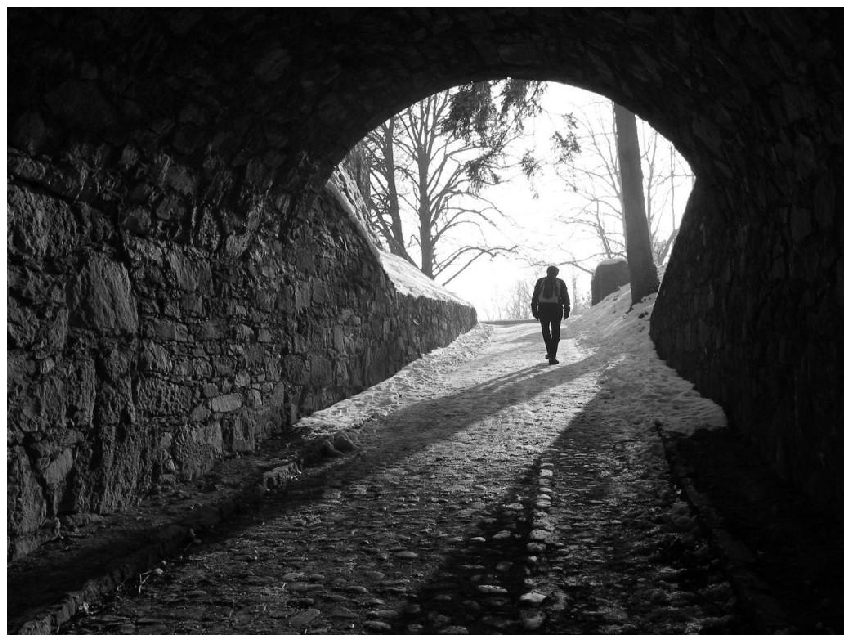

In [5]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.axis('off')
plt.imshow(img, cmap='gray')

Se realiza el filtrado de la imagen mediante un filtro pasa altos, el cual se presenta a continuación. Este tipo de filtro generará un realce de los highlights en la imagen de entrada, haciendo visibles zonas que antes eran oscuras. Como contraparte, generará que algunas zonas que ya eran claras, se saturen.

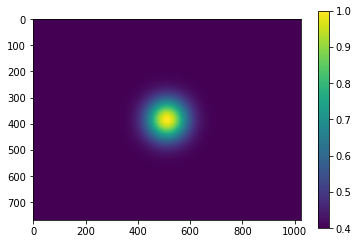

In [31]:
img_f = homomorphic_filtering(img, plot_filter=True)

Finalmente, la imagen de salida:

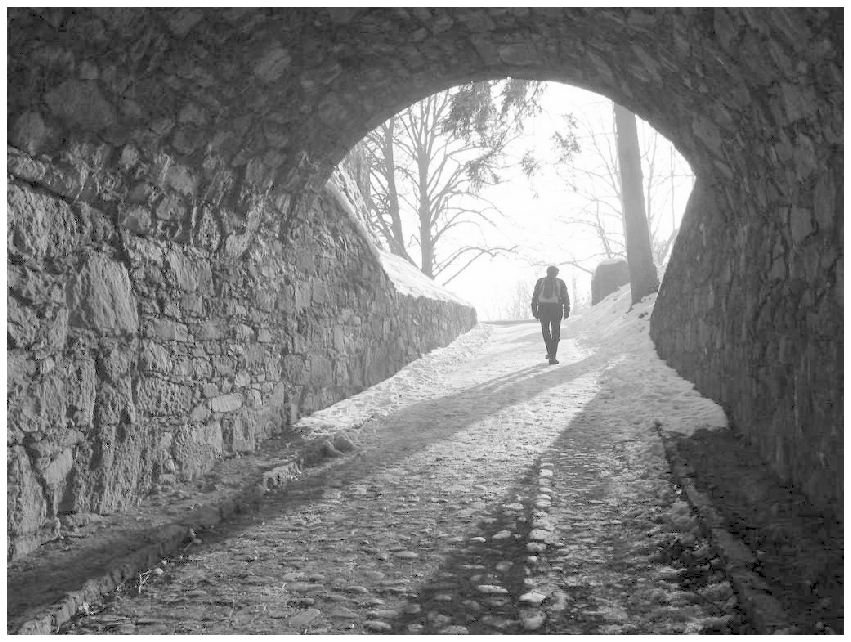

In [28]:
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.axis('off')
plt.imshow(img_f, cmap='gray')